In [1]:
pip install geopandas pandas fuzzywuzzy matplotlib



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


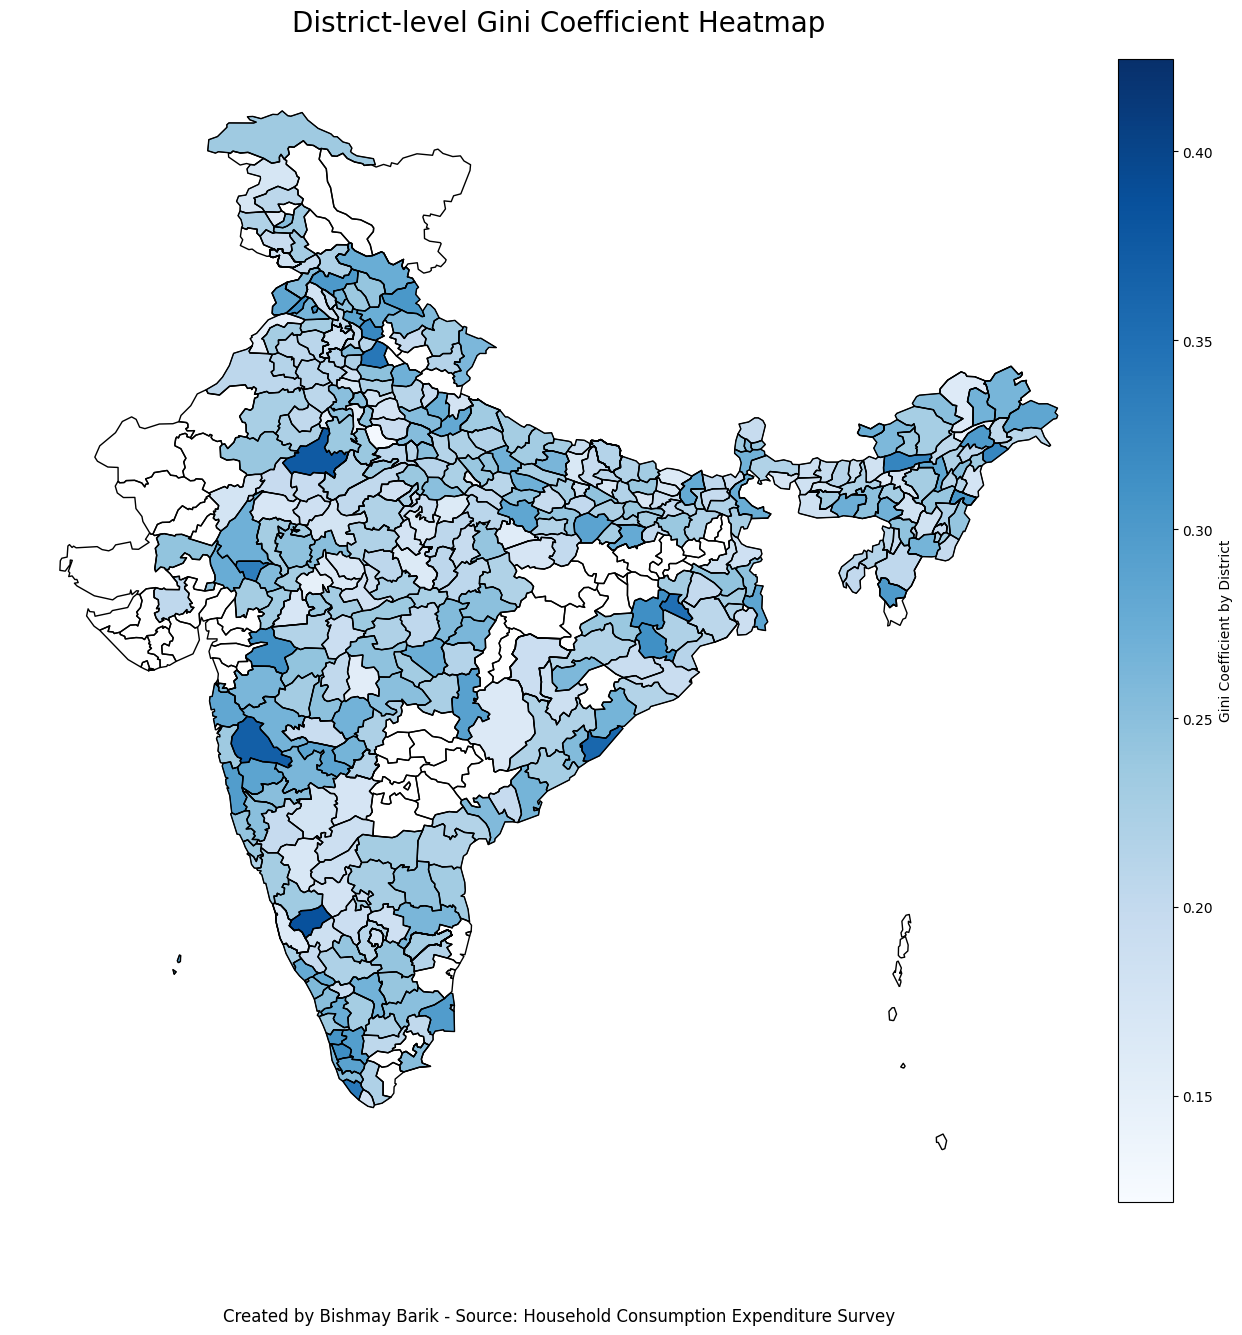

In [8]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import process
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the shapefile
shapefile_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/India_District_State_Gini/02. Output/India Shape/india_ds.shp'
gdf = gpd.read_file(shapefile_path)

# Load the CSV with Gini coefficients
csv_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/India_District_State_Gini/02. Output/district_gini.csv'
df = pd.read_csv(csv_path)

# Ensure lowercase for matching and convert to strings
gdf['DISTRICT'] = gdf['DISTRICT'].str.lower().astype(str)
gdf['STATE'] = gdf['STATE'].str.lower().astype(str)
df['district_name'] = df['district_name'].str.lower().astype(str)
df['state_name'] = df['state_name'].str.lower().astype(str)

# Combine district and state names for better matching
gdf['district_state'] = gdf['DISTRICT'] + ", " + gdf['STATE']
df['district_state'] = df['district_name'] + ", " + df['state_name']

# Handle NaN values by replacing them with an empty string
df['district_state'] = df['district_state'].fillna('')

# Fuzzy matching function for district and state
def fuzzy_match(district_state, choices, threshold=80):
    if district_state.strip():  # Only try matching non-empty strings
        match, score = process.extractOne(district_state, choices)
        return match if score >= threshold else None
    return None

# Apply fuzzy matching
district_state_names = gdf['district_state'].tolist()
df['matched_district_state'] = df['district_state'].apply(lambda x: fuzzy_match(x, district_state_names))

# Merge the shapefile and the CSV data based on the combined district and state names
merged_gdf = gdf.merge(df, left_on='district_state', right_on='matched_district_state', how='left')

# Plot the heatmap with enhanced styling
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot the district boundaries
merged_gdf.boundary.plot(ax=ax, linewidth=1, color='black')

# Create a color map for Gini coefficients (using different shades of blue)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the Gini coefficient data with shades of blue
gini_plot = merged_gdf.plot(column='gini_district', cmap='Blues', legend=True,
                            legend_kwds={'label': "Gini Coefficient by District", 'orientation': "vertical"},
                            ax=ax, cax=cax, edgecolor='black', linewidth=0.6)

# Add title and remove axis
ax.set_title('District-level Gini Coefficient Heatmap', fontdict={'fontsize': 20}, pad=20)
ax.axis('off')

# Add annotation for credit and source
plt.text(0.5, -0.1, 'Created by Bishmay Barik - Source: Household Consumption Expenditure Survey',
         ha='center', va='center', fontsize=12, transform=ax.transAxes)

# Save the plot to the specified path
output_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/India_District_State_Gini/04. Figures/gini_heatmap_shades_of_blue.png'
plt.savefig(output_path, bbox_inches='tight', dpi=300)

# Optionally, you can display it too
plt.show()


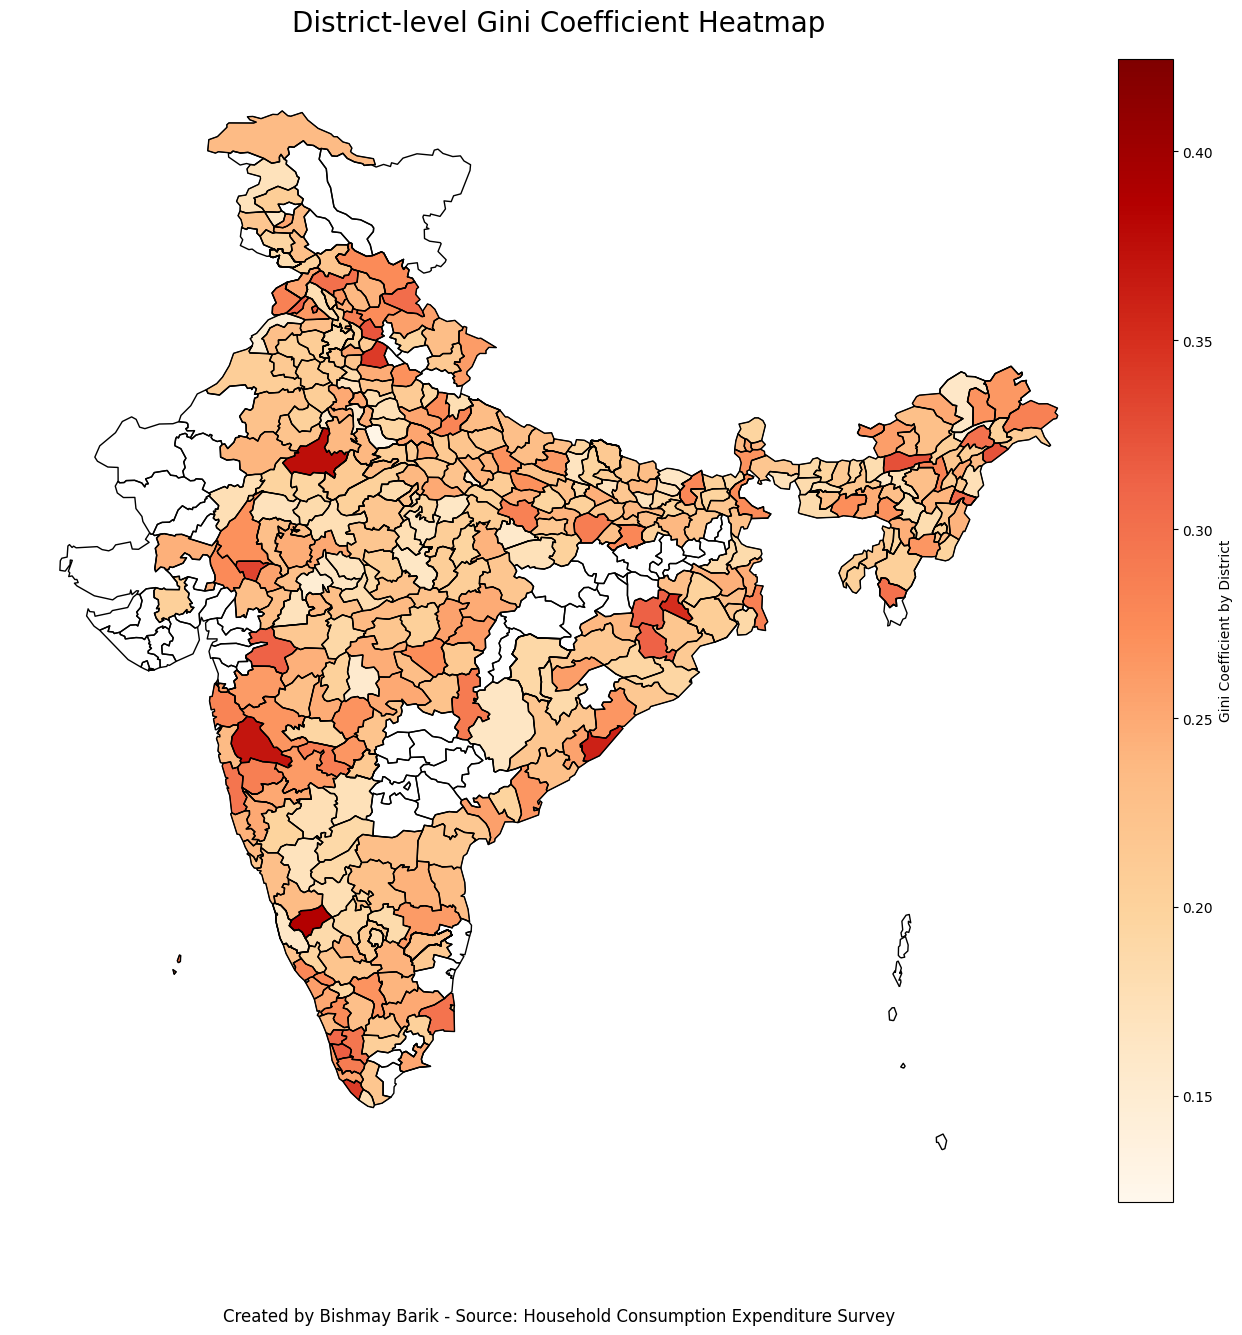

In [9]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from fuzzywuzzy import process
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Load the shapefile
shapefile_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/India_District_State_Gini/02. Output/India Shape/india_ds.shp'
gdf = gpd.read_file(shapefile_path)

# Load the CSV with Gini coefficients
csv_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/India_District_State_Gini/02. Output/district_gini.csv'
df = pd.read_csv(csv_path)

# Ensure lowercase for matching and convert to strings
gdf['DISTRICT'] = gdf['DISTRICT'].str.lower().astype(str)
gdf['STATE'] = gdf['STATE'].str.lower().astype(str)
df['district_name'] = df['district_name'].str.lower().astype(str)
df['state_name'] = df['state_name'].str.lower().astype(str)

# Combine district and state names for better matching
gdf['district_state'] = gdf['DISTRICT'] + ", " + gdf['STATE']
df['district_state'] = df['district_name'] + ", " + df['state_name']

# Handle NaN values by replacing them with an empty string
df['district_state'] = df['district_state'].fillna('')

# Fuzzy matching function for district and state
def fuzzy_match(district_state, choices, threshold=80):
    if district_state.strip():  # Only try matching non-empty strings
        match, score = process.extractOne(district_state, choices)
        return match if score >= threshold else None
    return None

# Apply fuzzy matching
district_state_names = gdf['district_state'].tolist()
df['matched_district_state'] = df['district_state'].apply(lambda x: fuzzy_match(x, district_state_names))

# Merge the shapefile and the CSV data based on the combined district and state names
merged_gdf = gdf.merge(df, left_on='district_state', right_on='matched_district_state', how='left')

# Plot the heatmap with enhanced styling
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Plot the district boundaries
merged_gdf.boundary.plot(ax=ax, linewidth=1, color='black')

# Create a color map for Gini coefficients (using orange to red)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the Gini coefficient data with shades of orange to red
gini_plot = merged_gdf.plot(column='gini_district', cmap='OrRd', legend=True,
                            legend_kwds={'label': "Gini Coefficient by District", 'orientation': "vertical"},
                            ax=ax, cax=cax, edgecolor='black', linewidth=0.6)

# Add title and remove axis
ax.set_title('District-level Gini Coefficient Heatmap', fontdict={'fontsize': 20}, pad=20)
ax.axis('off')

# Add annotation for credit and source
plt.text(0.5, -0.1, 'Created by Bishmay Barik - Source: Household Consumption Expenditure Survey',
         ha='center', va='center', fontsize=12, transform=ax.transAxes)

# Save the plot to the specified path
output_path = '/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/India_District_State_Gini/04. Figures/gini_heatmap_orange_red.png'
plt.savefig(output_path, bbox_inches='tight', dpi=300)

# Optionally, you can display it too
plt.show()
